In [1]:
import matplotlib as mpl
mpl.rc('text', usetex = True)
mpl.rc('font', size = 14)

from IPython.core.display import display

from MoneyGridModel import MoneyGridModel

NameError: name 'Agent' is not defined

In [4]:
# store data from 100 num_runs
num_runs = 500

# each run has num_steps steps
num_steps = 100

# each model has num_agents agents
num_agents = 20

# size of the grid
grid_width = 100
grid_height = 100

# data from all simulations
wealth_data = []

for _ in range(num_runs):
    # create a model
    model = MoneyGridModel(num_agents, grid_width, grid_height)

    # execute 100 steps
    for _ in range(num_steps):
        model.step()
        
    for a in model.schedule.agents:
        wealth_data.append(a.wealth)

AttributeError: module 'mesa' has no attribute 'space'

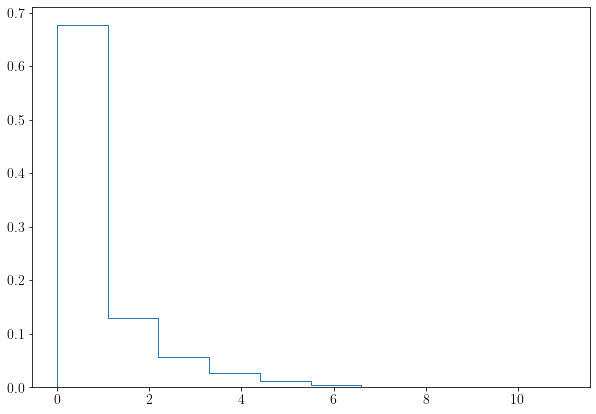

In [3]:
fig = mpl.figure.Figure(figsize=(10,7))
axs = fig.add_subplot()
axs.hist(wealth_data, density=True, histtype='step')
display(fig)